In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data
data = pd.read_csv('carbon_weather_data.csv',index_col='time')
data.index = pd.to_datetime(data.index)

#Add the day of the week
day_name_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
data["day_name"] = data.index.weekday.map(day_name_map)

#Going to do some more data cleaning turn weekend and bankholiday to integers
data['is_weekend'] = data['is_weekend'].astype(int)
data['is_bank_holiday'] = data['is_bank_holiday'].astype(int)
data.head()

,intensity.forecast,intensity.actual,intensity.index,imports,Fossil_like_share,Low_carbon_share,avg_wind,wind_overflow,avg_temp,avg_cover,day_of_week,is_weekend,hour,is_bank_holiday,2hr_rolling_from_2hrs_ago,2hr_rolling_from_1d_ago,day_name
time,,,,,,,,,,,,,,,,,
2024-03-26 01:30:00,89,92,low,22.7,24.3,53.1,12.066667,0.0,5.433333,99.666667,1,0,1,0,153.50,146.25,Tue
2024-03-26 02:00:00,92,94,low,22.9,24.7,52.4,12.166667,0.0,5.233333,99.333333,1,0,2,0,138.75,137.50,Tue
2024-03-26 02:30:00,97,102,low,22.7,26.0,51.3,12.550000,0.0,5.150000,99.666667,1,0,2,0,124.25,131.75,Tue
2024-03-26 03:00:00,93,103,low,22.7,26.5,50.8,12.933333,0.0,5.066667,100.000000,1,0,3,0,111.00,128.00,Tue
2024-03-26 03:30:00,94,99,low,20.9,28.2,51.0,12.650000,0.0,5.133333,100.000000,1,0,3,0,98.75,125.00,Tue


In [3]:
#Realised have duplicates should have dealt with earlier, appear to be exact same so can drop
dupe = data[data.index.duplicated(keep=False)]

print(dupe.sort_values('time'))

                     intensity.forecast  intensity.actual intensity.index  \
time                                                                        
2024-04-07 23:30:00                  67                53             low   
2024-04-07 23:30:00                  67                53             low   
2024-04-07 23:30:00                  67                53             low   
2024-04-07 23:30:00                  67                53             low   
2024-04-21 23:30:00                 144               168        moderate   
2024-04-21 23:30:00                 144               168        moderate   
2024-04-21 23:30:00                 144               168        moderate   
2024-04-21 23:30:00                 144               168        moderate   
2024-05-05 23:30:00                 172               159        moderate   
2024-05-05 23:30:00                 172               159        moderate   
2024-05-05 23:30:00                 172               159        moderate   

In [4]:
data = data[~data.index.duplicated(keep='first')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


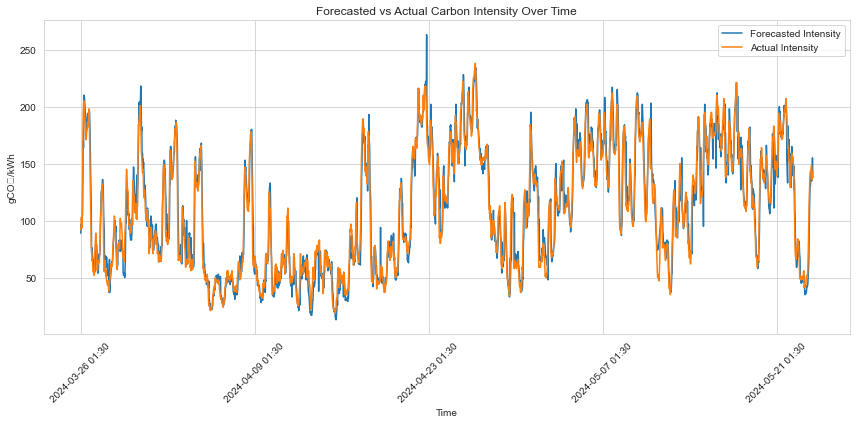

In [5]:
# Set Seaborn style
sns.set_style('whitegrid')

# Plot both lines
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=data.index, y='intensity.forecast', data=data, label='Forecasted Intensity')
sns.lineplot(x=data.index, y='intensity.actual', data=data, label='Actual Intensity')

#Show every nth tick
xticks = data.index[::672]  # every other week
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%Y-%m-%d %H:%M'), rotation=45)

# Label the plot
plt.title('Forecasted vs Actual Carbon Intensity Over Time')
plt.xlabel('Time')
plt.ylabel('gCO₂/kWh')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('forecast_vs_actual.png', dpi=300)
plt.show()

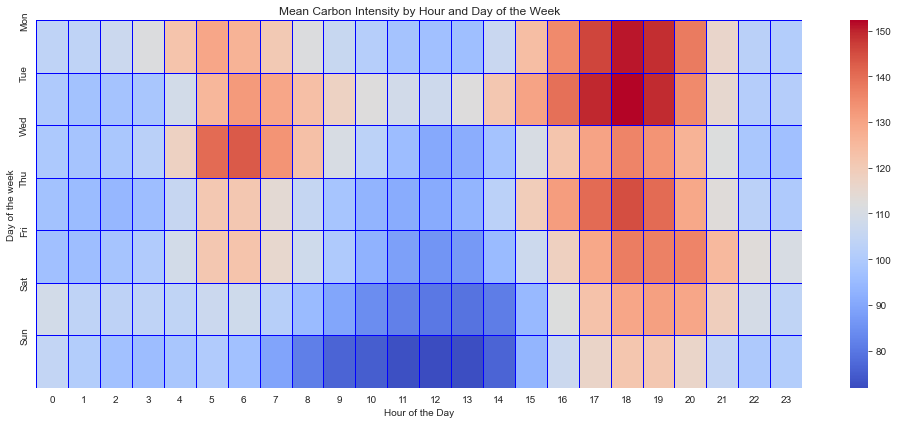

In [6]:
#Want to draw a heatmap showing the actual intensity mean based on the time
#and day of the week, so few bank holidays will leave in

weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
heatmap_data = data.pivot_table(
    values = 'intensity.actual',
    index='day_of_week', #rows
    columns='hour',#columns
    aggfunc='mean'
)

#Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths = 0.6, linecolor='blue')
plt.title('Mean Carbon Intensity by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the week')

plt.yticks(ticks=range(7), labels = weekdays)


plt.tight_layout()
plt.show()

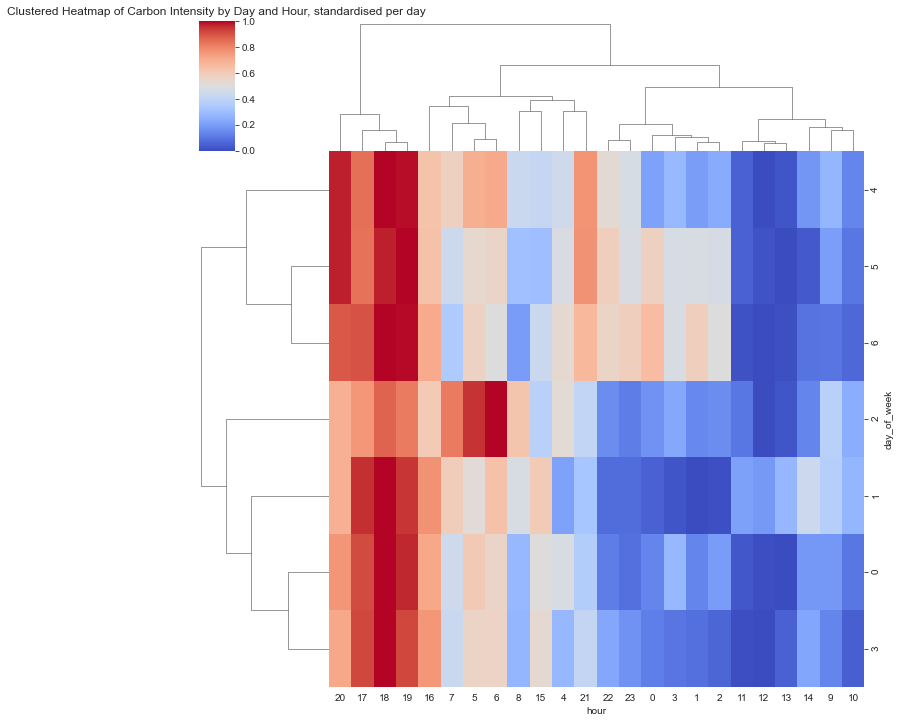

In [7]:
#Going to look at a clustermap so can explore which days and hours are seen
#as being similar as while looks clear can explore
#Shows how peaking compares for different days
sns.clustermap(heatmap_data, cmap="coolwarm", standard_scale=0)

plt.title("Clustered Heatmap of Carbon Intensity by Day and Hour, standardised per day")  
plt.show()

In [8]:
#As expected Saturday most similar to Sundat and can see between 
#1700 and 1900 is similar appears to be peak
#Wednesday onl

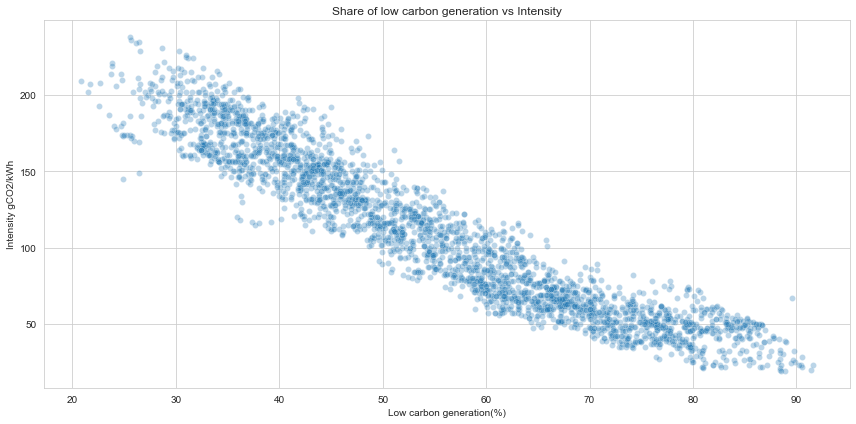

In [9]:
#Plotting the percentage of carbon like fuels in the mix against co2 intensity
#Expecting a strong correlation
plt.figure(figsize=(12,6))

sns.scatterplot(x='Low_carbon_share', y='intensity.actual', data=data, alpha=0.3)

plt.title('Share of low carbon generation vs Intensity')
plt.xlabel('Low carbon generation(%)')
plt.ylabel('Intensity gCO2/kWh')
plt.tight_layout()
plt.savefig('Low_carbon_png_generatio_vs_intensity.png', dpi=300)
plt.show()

In [10]:
#As expected, there's a strong negative correlation, want to get r^2 and regression line
from sklearn.linear_model import LinearRegression

x=data['Low_carbon_share'].values.reshape(-1,1)
y=data['intensity.actual'].values

model = LinearRegression().fit(x,y)
r_squared = model.score(x,y)
print(f'R^2: {r_squared:.3f}')

R^2: 0.896


In [11]:
#89.6% of the variation can be explained looking at generation which was
#to be expected as think it should be explicitly linked
#

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


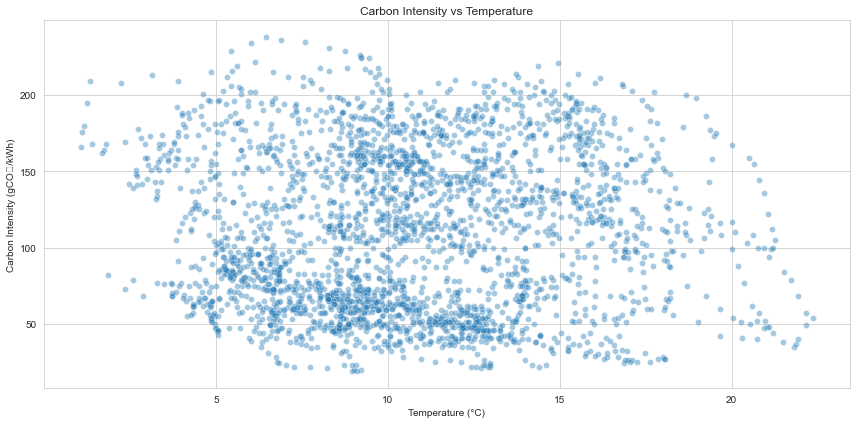

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_temp', y='intensity.actual', data=data, alpha=0.4)

plt.title('Carbon Intensity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Carbon Intensity (gCO₂/kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

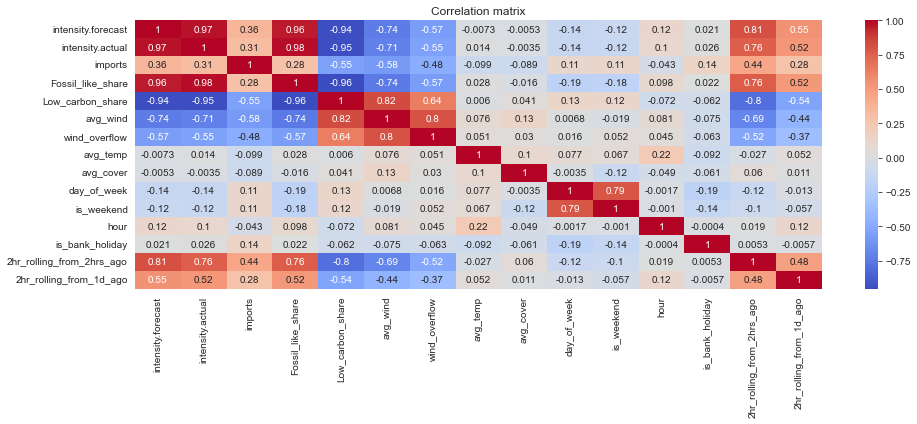

In [13]:
#Want to create a correlation map with the numeric columns
numeric_cols = data.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(14,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.tight_layout()
plt.savefig('Correlation_matrix.png', dpi=300)
plt.show()

In [14]:
#In the correlation matrix low carbon share and average wind are closely
#correlated suggesting this feature is somewhat accurately predicting 
#wind generation
#Temperature appears to have a much weaker correlation than expected
#However since using XgBoost will still add all to model

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


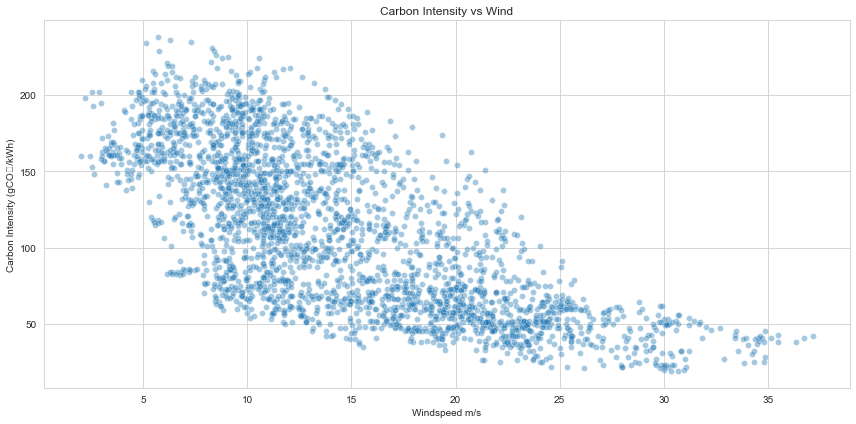

In [15]:
#Ready to move onto modelling but going to add plots of other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_wind', y='intensity.actual', data=data, alpha=0.4)

plt.title('Carbon Intensity vs Wind')
plt.xlabel('Windspeed m/s')
plt.ylabel('Carbon Intensity (gCO₂/kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


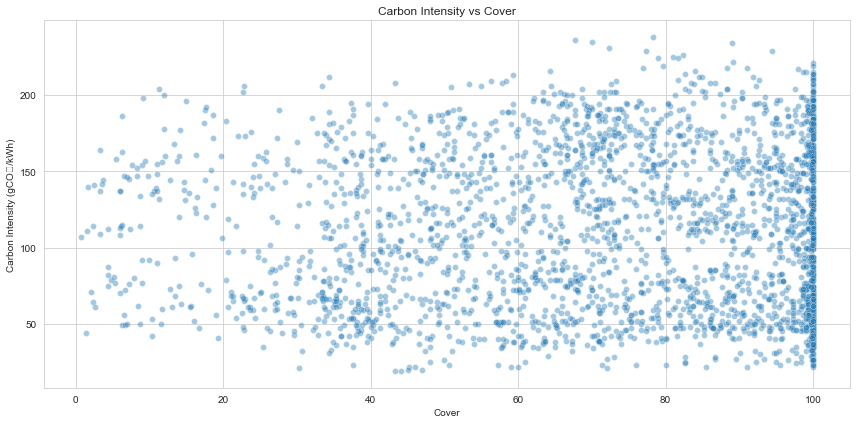

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_cover', y='intensity.actual', data=data, alpha=0.4)

plt.title('Carbon Intensity vs Cover')
plt.xlabel('Cover')
plt.ylabel('Carbon Intensity (gCO₂/kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
#Going to add dummy variables for day of the week
data=data.drop(columns=['day_of_week'])

data=pd.get_dummies(data, columns=['day_name'],drop_first=True)

In [18]:
data.head()

,intensity.forecast,intensity.actual,intensity.index,imports,Fossil_like_share,Low_carbon_share,avg_wind,wind_overflow,avg_temp,avg_cover,...,hour,is_bank_holiday,2hr_rolling_from_2hrs_ago,2hr_rolling_from_1d_ago,day_name_Mon,day_name_Sat,day_name_Sun,day_name_Thu,day_name_Tue,day_name_Wed
time,,,,,,,,,,,,,,,,,,,,,
2024-03-26 01:30:00,89,92,low,22.7,24.3,53.1,12.066667,0.0,5.433333,99.666667,...,1,0,153.50,146.25,0,0,0,0,1,0
2024-03-26 02:00:00,92,94,low,22.9,24.7,52.4,12.166667,0.0,5.233333,99.333333,...,2,0,138.75,137.50,0,0,0,0,1,0
2024-03-26 02:30:00,97,102,low,22.7,26.0,51.3,12.550000,0.0,5.150000,99.666667,...,2,0,124.25,131.75,0,0,0,0,1,0
2024-03-26 03:00:00,93,103,low,22.7,26.5,50.8,12.933333,0.0,5.066667,100.000000,...,3,0,111.00,128.00,0,0,0,0,1,0
2024-03-26 03:30:00,94,99,low,20.9,28.2,51.0,12.650000,0.0,5.133333,100.000000,...,3,0,98.75,125.00,0,0,0,0,1,0


In [19]:
data.to_csv('Processed_carbon_forecast.csv', index=True)